# Code for the analysis of data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Reading CSV file excluding 2015 data, converting to DateTime format, and extracting date, month, time and hours

In [3]:
 data = pd.read_csv("EAU_Rooms.csv",parse_dates=[['Date', 'Time']])
# data = pd.read_csv("Desktop/Europa_EAU/EAU_Rooms2.csv")
for i in range(1,28):
    data = data.ix[(data['R'+str(i)] >= 0)]
    
data['Total']= data['R1']
for i in range(2,28):
    data['Total']= data['Total']+data['R'+str(i)]
    
# data['Date_Time']= pd.to_datetime(data['Date_Time']) 
# data['date'] = pd.DatetimeIndex(data['Date_Time']).date
# data['month'] = pd.DatetimeIndex(data['Date_Time']).month



C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [4]:
data['Date_Time']= pd.to_datetime(data['Date_Time']) 
data['date'] = pd.DatetimeIndex(data['Date_Time']).date
data['month'] = pd.DatetimeIndex(data['Date_Time']).month



In [5]:
data['year'] = pd.DatetimeIndex(data['Date_Time']).year


In [6]:
data['hour'] = pd.DatetimeIndex(data['Date_Time']).hour

In [7]:
data

,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R23,R24,R25,R26,R27,Total,date,month,year,hour
0,2016-01-01 00:58:28,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,10.0,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
1,2016-01-01 00:55:28,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,10.0,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
2,2016-01-01 00:52:28,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,10.0,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
3,2016-01-01 00:49:28,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,10.0,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
4,2016-01-01 00:46:28,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,10.0,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650821,2019-09-20 12:30:48,28.96,716.34,23.03,646.78,32.22,688.66,19.17,580.22,423.1,...,4928.38,10.55,6.09,4.66,9.02,16648.15,2019-09-20,9,2019,12
650822,2019-09-20 12:27:48,28.96,716.34,23.03,646.78,32.22,688.66,19.17,580.22,423.1,...,4928.33,10.55,6.09,4.66,9.02,16648.05,2019-09-20,9,2019,12
650823,2019-09-20 12:24:48,28.96,716.34,23.03,646.78,32.22,688.65,19.17,580.22,423.1,...,4928.33,10.55,6.09,4.66,9.02,16648.02,2019-09-20,9,2019,12
650824,2019-09-20 12:21:48,28.96,716.34,23.03,646.76,32.22,688.65,19.17,580.21,423.1,...,4928.30,10.55,6.09,4.66,9.02,16647.89,2019-09-20,9,2019,12


In [8]:
data=data.sort_values(by=['Date_Time'])

In [9]:
data = data.reset_index()
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R23,R24,R25,R26,R27,Total,date,month,year,hour
0,19,2016-01-01 00:01:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
1,18,2016-01-01 00:04:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
2,17,2016-01-01 00:07:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
3,16,2016-01-01 00:10:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
4,15,2016-01-01 00:13:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650714,647203,2019-12-09 23:47:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,4893.47,10.55,6.02,4.66,9.02,16541.13,2019-12-09,12,2019,23
650715,647202,2019-12-09 23:50:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,4893.47,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23
650716,647201,2019-12-09 23:53:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,4893.47,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23
650717,647200,2019-12-09 23:56:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,4893.47,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23


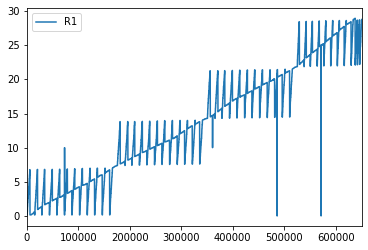

In [35]:
data.plot(y='R1')

In [11]:
data['Index'] = data.index/1000
x = data['Index']
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R24,R25,R26,R27,Total,date,month,year,hour,Index
0,19,2016-01-01 00:01:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0,0.000
1,18,2016-01-01 00:04:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0,0.001
2,17,2016-01-01 00:07:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0,0.002
3,16,2016-01-01 00:10:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0,0.003
4,15,2016-01-01 00:13:27,0.13,2.23,10.00,10.00,10.00,10.00,10.00,10.00,...,0.00,0.00,0.00,0.00,118.88,2016-01-01,1,2016,0,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650714,647203,2019-12-09 23:47:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,10.55,6.02,4.66,9.02,16541.13,2019-12-09,12,2019,23,650.714
650715,647202,2019-12-09 23:50:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23,650.715
650716,647201,2019-12-09 23:53:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23,650.716
650717,647200,2019-12-09 23:56:47,28.77,711.58,22.91,641.82,32.02,684.94,19.06,576.79,...,10.55,6.02,4.66,9.02,16541.14,2019-12-09,12,2019,23,650.717


In [12]:
from sklearn import datasets
import statsmodels.api as sm

y1 = data['Total']
model  = sm.OLS(y1,x).fit()
pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          5.142e+07
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                        0.00
Time:                        15:29:07   Log-Likelihood:                     -5.4534e+06
No. Observations:              650719   AIC:                                  1.091e+07
Df Residuals:                  650718   BIC:                                  1.091e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Index         24.9723      0.003   7170.937      0.000      24.966      24.979
==============================================================================
Omnibus:                    57761.714   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           358921.844
Skew:                          -0.175   Prob(JB):                         0.00
Kurtosis:                       6.622   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

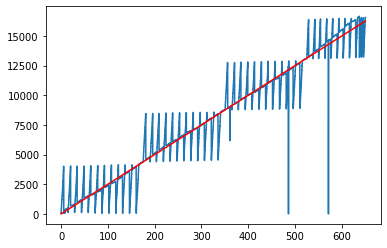

In [13]:
plt.plot(x,y1)
plt.plot(x,pred,color='red')
plt.show()

In [14]:
# data['Date'] = pd.DatetimeIndex(data['Date'])

# data2: data grouped by month of the year

In [15]:
data2= data.groupby(['year','month']).sum()

In [16]:
data6= data.groupby(['date']).sum()

In [17]:
data6 = data6.reset_index()


In [18]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R23,R24,R25,R26,R27,Total,month,year,hour,Index
0,2016-01-01,114960,63.99,1081.53,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,...,0.00,0.00,0.00,0.00,0.00,57097.38,480,967680,5520,114.960
1,2016-01-02,7220880,281.14,4796.87,264.73,5995.30,387.12,13604.77,187.26,5879.88,...,8783.39,1171.20,4.80,172.80,268.80,236182.95,480,967680,5520,345.360
2,2016-01-03,13900080,655.32,11559.78,814.29,14356.90,860.48,24655.11,499.13,12095.97,...,29222.40,1214.40,0.00,177.60,350.40,389359.34,480,967680,5520,575.760
3,2016-01-04,21019440,950.36,18632.48,1313.85,22675.64,1282.12,33679.25,814.86,18923.73,...,87576.63,1156.80,144.00,100.80,667.20,577451.68,480,967680,5520,806.160
4,2016-01-05,27928560,1233.60,25089.60,1747.20,30451.20,1694.40,42004.80,1147.20,25675.20,...,107568.00,1209.60,148.80,153.60,686.40,720050.20,480,967680,5520,1036.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2019-12-05,281700858,12219.29,303585.41,10169.17,272900.67,14130.50,302354.37,8516.62,254008.91,...,2102886.64,4732.52,2811.73,2189.03,3190.14,7123151.53,5748,967101,5518,310661.198
1355,2019-12-06,288818319,12621.77,312403.68,10363.52,281901.21,14423.81,308531.59,8651.87,259828.40,...,2164474.26,4794.79,2854.84,2189.03,3190.14,7324689.11,5748,967101,5518,310890.639
1356,2019-12-07,295669456,13037.17,322515.67,10582.88,291949.53,14777.37,315952.02,8816.68,266062.02,...,2237235.73,4833.11,2869.21,2198.61,3190.14,7570655.58,5748,967101,5505,311120.080
1357,2019-12-08,302786438,13424.15,331981.75,10782.54,299748.33,15093.29,322245.36,8976.46,271150.95,...,2286797.66,4833.11,2878.79,2212.00,3190.14,7747397.51,5748,967101,5518,311349.521


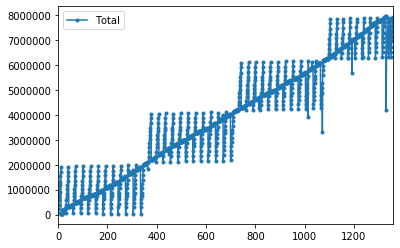

In [19]:
data6.plot(y='Total', style='.-')

In [20]:
data6['Index'] = data6.index
x6 = data6['Index']



In [21]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R23,R24,R25,R26,R27,Total,month,year,hour,Index
0,2016-01-01,114960,63.99,1081.53,4800.00,4800.00,4800.00,4800.00,4800.00,4800.00,...,0.00,0.00,0.00,0.00,0.00,57097.38,480,967680,5520,0
1,2016-01-02,7220880,281.14,4796.87,264.73,5995.30,387.12,13604.77,187.26,5879.88,...,8783.39,1171.20,4.80,172.80,268.80,236182.95,480,967680,5520,1
2,2016-01-03,13900080,655.32,11559.78,814.29,14356.90,860.48,24655.11,499.13,12095.97,...,29222.40,1214.40,0.00,177.60,350.40,389359.34,480,967680,5520,2
3,2016-01-04,21019440,950.36,18632.48,1313.85,22675.64,1282.12,33679.25,814.86,18923.73,...,87576.63,1156.80,144.00,100.80,667.20,577451.68,480,967680,5520,3
4,2016-01-05,27928560,1233.60,25089.60,1747.20,30451.20,1694.40,42004.80,1147.20,25675.20,...,107568.00,1209.60,148.80,153.60,686.40,720050.20,480,967680,5520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,2019-12-05,281700858,12219.29,303585.41,10169.17,272900.67,14130.50,302354.37,8516.62,254008.91,...,2102886.64,4732.52,2811.73,2189.03,3190.14,7123151.53,5748,967101,5518,1354
1355,2019-12-06,288818319,12621.77,312403.68,10363.52,281901.21,14423.81,308531.59,8651.87,259828.40,...,2164474.26,4794.79,2854.84,2189.03,3190.14,7324689.11,5748,967101,5518,1355
1356,2019-12-07,295669456,13037.17,322515.67,10582.88,291949.53,14777.37,315952.02,8816.68,266062.02,...,2237235.73,4833.11,2869.21,2198.61,3190.14,7570655.58,5748,967101,5505,1356
1357,2019-12-08,302786438,13424.15,331981.75,10782.54,299748.33,15093.29,322245.36,8976.46,271150.95,...,2286797.66,4833.11,2878.79,2212.00,3190.14,7747397.51,5748,967101,5518,1357


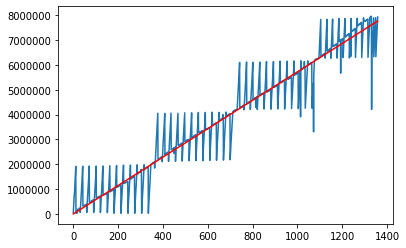

In [22]:
y6 = data6['Total']
model6  = sm.OLS(y6,x6).fit()
pred6 = model6.predict(x6)

plt.plot(x6,y6)
plt.plot(x6,pred6,color='red')
plt.show()

In [23]:
data2 = data2.iloc[0:44]

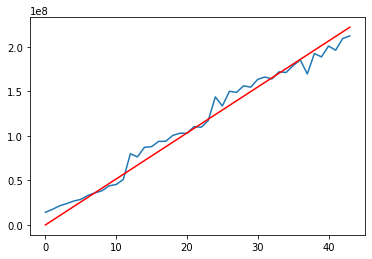

In [24]:
data2 = data2.reset_index()
data2['Index'] = data2.index
x2 = data2['Index']
y2 = data2['Total']
model2  = sm.OLS(y2,x2).fit()
pred2 = model2.predict(x2)

plt.plot(x2,y2)
plt.plot(x2,pred2,color='red')
plt.show()

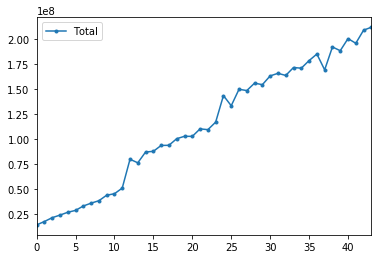

In [25]:
data2.plot(y='Total', style='.-')

# data3: get faulty 0 values in the data field

In [26]:
data3 = data.ix[(data['Total'] <= 25)]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [27]:
data3

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R24,R25,R26,R27,Total,date,month,year,hour,Index
486256,500580,2018-10-11 15:54:26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,15,486.256
486257,500579,2018-10-11 15:57:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,15,486.257
486264,500594,2018-10-11 16:18:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.264
486265,500593,2018-10-11 16:21:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.265
486266,500592,2018-10-11 16:24:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.266
486267,500591,2018-10-11 16:27:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.267
486268,500590,2018-10-11 16:30:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.268
486269,500589,2018-10-11 16:33:27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.269
486270,500588,2018-10-11 16:36:28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.270
486271,500587,2018-10-11 16:39:28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2018-10-11,10,2018,16,486.271


In [28]:
data['date']= pd.to_datetime(data['date']) 

In [29]:
data.describe()

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R23,R24,R25,R26,R27,Total,month,year,hour,Index
count,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,...,650719.000000,650719.000000,650719.000000,650719.000000,650719.000000,650719.00000,650719.000000,650719.000000,650719.000000,650719.000000
mean,325445.573698,13.719677,332.333023,13.093010,316.697346,17.644662,370.239415,10.740092,306.714150,219.813349,...,2247.578984,6.800673,2.742324,1.829731,5.190261,8164.75906,6.319384,2017.385013,11.506364,325.359000
std,187873.679383,8.137437,207.794175,5.914025,173.241809,9.197239,193.199935,5.416304,170.239225,121.901647,...,1488.829272,2.823910,1.795414,1.166218,1.764284,4740.35979,3.394582,1.077964,6.922381,187.846539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2016.000000,0.000000,0.000000
25%,162729.500000,6.810000,150.780000,9.300000,178.370000,9.880000,201.840000,6.420000,155.370000,116.710000,...,897.560000,4.740000,0.750000,1.150000,5.370000,4023.18500,3.000000,2016.000000,6.000000,162.679500
50%,325466.000000,13.350000,320.010000,13.820000,328.120000,18.640000,384.350000,11.100000,322.310000,220.970000,...,2217.470000,7.330000,2.860000,1.560000,5.800000,8154.16000,6.000000,2017.000000,12.000000,325.359000
75%,488145.500000,20.360000,507.660000,17.330000,442.425000,25.320000,533.560000,15.530000,453.140000,324.520000,...,3497.360000,9.600000,3.510000,2.290000,5.800000,12105.06000,9.000000,2018.000000,18.000000,488.038500
max,650825.000000,28.960000,716.390000,23.030000,646.790000,32.220000,688.660000,19.170000,580.220000,423.100000,...,4928.720000,10.550000,6.090000,4.660000,9.020000,16648.58000,12.000000,2019.000000,23.000000,650.718000


# data5: data grouped into hours 

In [30]:
data5= data.groupby(['hour']).sum()

In [31]:
data5

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R22,R23,R24,R25,R26,R27,Total,month,year,Index
hour,,,,,,,,,,,,,,,,,,,,,
0,8847143094,373047.98,9036473.14,355970.90,8610186.11,479762.69,10066016.85,292031.02,8339071.19,5976625.03,...,0.0,6.111482e+07,184854.61,74557.84,49737.75,141051.19,2.219911e+08,171818,54832564,8844635.184
1,8758194939,369315.81,8946659.53,352291.57,8523020.73,474753.11,9962016.49,289019.03,8252654.30,5915620.22,...,0.0,6.050236e+07,182892.31,73767.75,49277.66,139538.57,2.197466e+08,170319,54263655,8755705.855
2,8726692582,367815.83,8906713.73,351599.61,8494706.71,473546.09,9934490.83,288293.73,8227994.74,5896205.99,...,0.0,6.021886e+07,182663.27,73465.98,49047.34,139627.06,2.189254e+08,170792,54362215,8725148.648
3,8847067449,372977.75,9034755.04,355900.59,8608584.90,479673.53,10064121.20,291974.22,8337521.59,5975475.20,...,0.0,6.110381e+07,184821.05,74548.29,49729.57,141027.43,2.219501e+08,171760,54820462,8844416.553
4,8844880681,372863.20,9031926.91,355796.14,8605980.59,479528.39,10061086.19,291886.41,8334961.21,5973640.44,...,0.0,6.108437e+07,184766.81,74525.92,49716.90,140992.26,2.218823e+08,171729,54808354,8842448.445
5,8845111869,372851.79,9031640.82,355785.07,8605676.81,479524.10,10060742.39,291876.50,8334674.75,5973436.01,...,0.0,6.108242e+07,184763.81,74523.61,49715.02,140984.46,2.218753e+08,171726,54806338,8842919.222
6,8835315919,372415.32,9020943.92,355421.58,8596308.94,478992.12,10049235.47,291545.05,8324921.99,5966585.39,...,0.0,6.100882e+07,184556.59,74441.88,49655.34,140857.43,2.216184e+08,171452,54755893,8831882.184
7,8836050699,372433.56,9021185.09,355442.36,8596622.92,479022.65,10049475.49,291550.57,8325065.61,5966729.80,...,0.0,6.101147e+07,184574.95,74448.31,49660.58,140859.22,2.216279e+08,171450,54765975,8832704.944
8,8813222490,371437.41,8996261.14,354618.91,8574031.45,477884.40,10024527.09,290869.99,8304233.77,5951481.60,...,0.0,6.082005e+07,184102.48,74194.31,49514.64,140556.99,2.209929e+08,171264,54659010,8810809.592


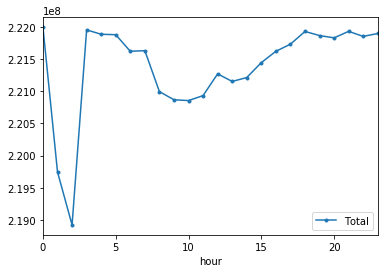

In [32]:
data5.plot(y='Total', style='.-')